In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')


In [3]:
print(X_train_df.shape)
print(X_train_df.columns)
print(y_train_df.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [4]:
X_train_df.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


## 畫出各feature和FGM的分佈圖

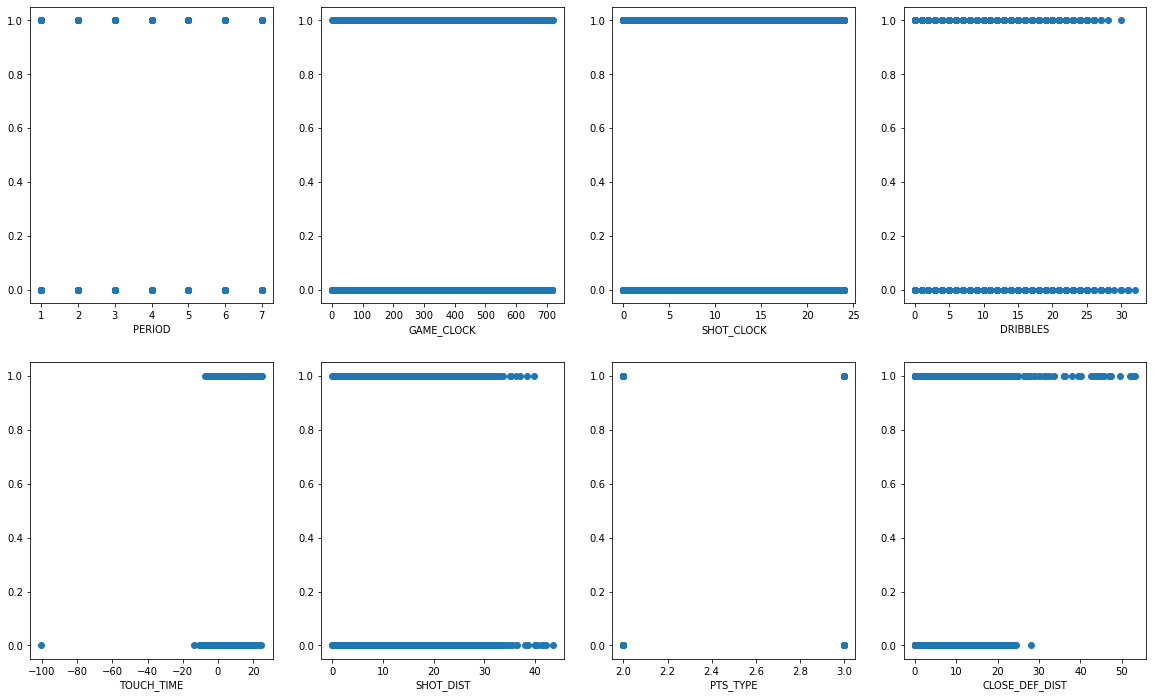

In [5]:
x_vars = X_train_df.columns

_, subplot_arr = plt.subplots(2, 4, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
  x_idx = idx // 4
  y_idx = idx % 4
  subplot_arr[x_idx, y_idx].scatter(X_train_df[x_var], y_train_df['FGM'])
  subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()


從scatter圖觀察到，在TOUCH_TIME的部分資料有負的，這看起來並不合理，可能為記錄錯誤。

## 看一下各個feature的分佈狀況

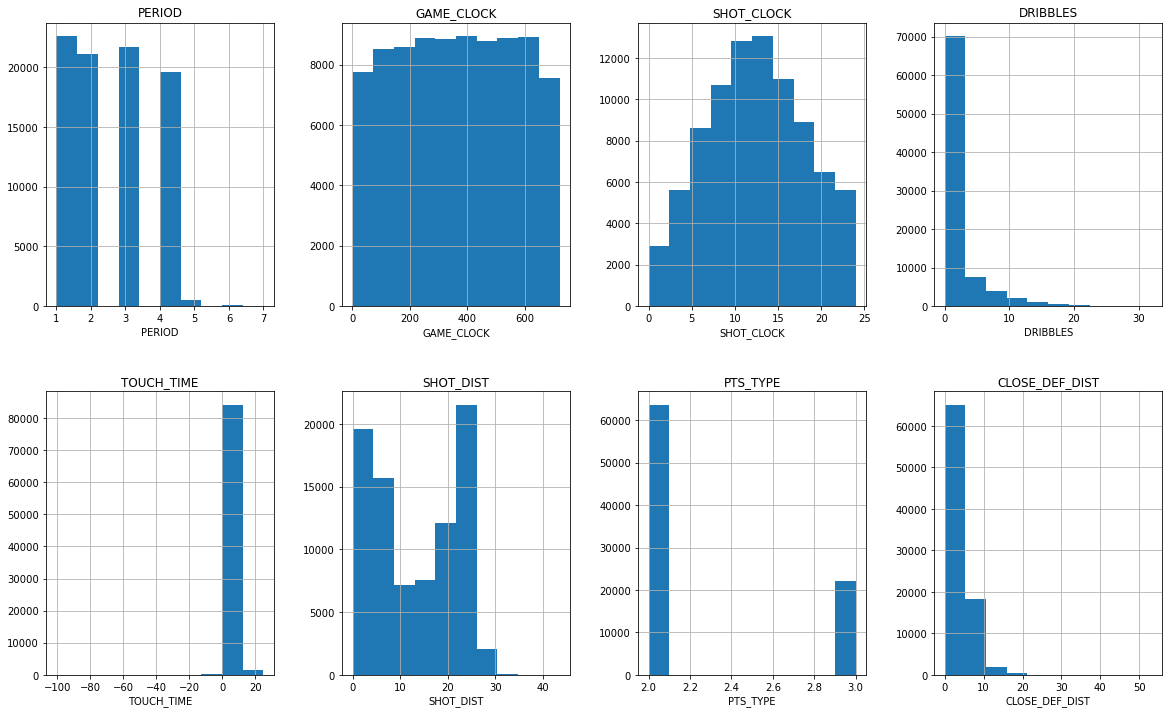

In [6]:
_, subplot_arr = plt.subplots(2, 4, figsize=(20, 12))
x_vars = X_train_df.columns
for idx, x_var in enumerate(x_vars):
    x_idx = idx // 4
    y_idx = idx % 4
    X_train_df.hist(column = x_var, bins = 10, ax = subplot_arr[x_idx,y_idx])
    subplot_arr[x_idx,y_idx].set_xlabel(x_var)

## 看一下在各feature的不同區間內，FG的命中率為多少

In [7]:
quantile_df = pd.DataFrame(index=range(X_train_df.shape[0]),columns=[])

for idx, x_var in enumerate(x_vars):
    quantile_df['quantile_' + x_var] = pd.qcut(X_train_df[x_var], q=10, duplicates='drop')
    
quantile_df.head()
    


,quantile_PERIOD,quantile_GAME_CLOCK,quantile_SHOT_CLOCK,quantile_DRIBBLES,quantile_TOUCH_TIME,quantile_SHOT_DIST,quantile_PTS_TYPE,quantile_CLOSE_DEF_DIST
0,"(0.999, 2.0]","(293.0, 363.0]","(-0.001, 4.8]","(-0.001, 1.0]","(3.1, 4.4]","(17.9, 20.8]","(1.999, 3.0]","(4.3, 4.9]"
1,"(0.999, 2.0]","(571.0, 640.0]","(7.1, 9.1]","(-0.001, 1.0]","(1.1, 1.6]","(2.5, 3.9]","(1.999, 3.0]","(-0.001, 1.4]"
2,"(0.999, 2.0]","(502.0, 571.0]","(17.8, 20.3]","(-0.001, 1.0]","(-100.501, 0.7]","(2.5, 3.9]","(1.999, 3.0]","(3.1, 3.7]"
3,"(0.999, 2.0]","(363.0, 432.0]","(7.1, 9.1]","(-0.001, 1.0]","(0.8, 0.9]","(20.8, 23.5]","(1.999, 3.0]","(4.3, 4.9]"
4,"(2.0, 3.0]","(363.0, 432.0]","(20.3, 24.0]","(-0.001, 1.0]","(-100.501, 0.7]","(3.9, 5.6]","(1.999, 3.0]","(2.5, 3.1]"


quantile_PERIOD
(0.999, 2.0] FG rate: 0.4576515220769723
(2.0, 3.0] FG rate: 0.46137180787314463
(3.0, 4.0] FG rate: 0.43872611464968153
(4.0, 7.0] FG rate: 0.39349112426035504
quantile_GAME_CLOCK
(0.999, 80.0] FG rate: 0.44233880286572685
(80.0, 152.0] FG rate: 0.4642731844228745
(152.0, 224.0] FG rate: 0.45637817170663886
(224.0, 293.0] FG rate: 0.4531470173790512
(293.0, 363.0] FG rate: 0.4527230590961761
(363.0, 432.0] FG rate: 0.4580277098614507
(432.0, 502.0] FG rate: 0.45532263731116057
(502.0, 571.0] FG rate: 0.4604536373251851
(571.0, 640.0] FG rate: 0.44783774332672804
(640.0, 720.0] FG rate: 0.4472115047351806
quantile_SHOT_CLOCK
(-0.001, 4.8] FG rate: 0.3694144400227402
(4.8, 7.1] FG rate: 0.4210211646538324
(7.1, 9.1] FG rate: 0.43280080437939894
(9.1, 10.8] FG rate: 0.44227144203581525
(10.8, 12.3] FG rate: 0.4519622685454757
(12.3, 14.0] FG rate: 0.44856237017601397
(14.0, 15.6] FG rate: 0.44891402133401875
(15.6, 17.8] FG rate: 0.4500286204922725
(17.8, 20.3] FG rate: 0

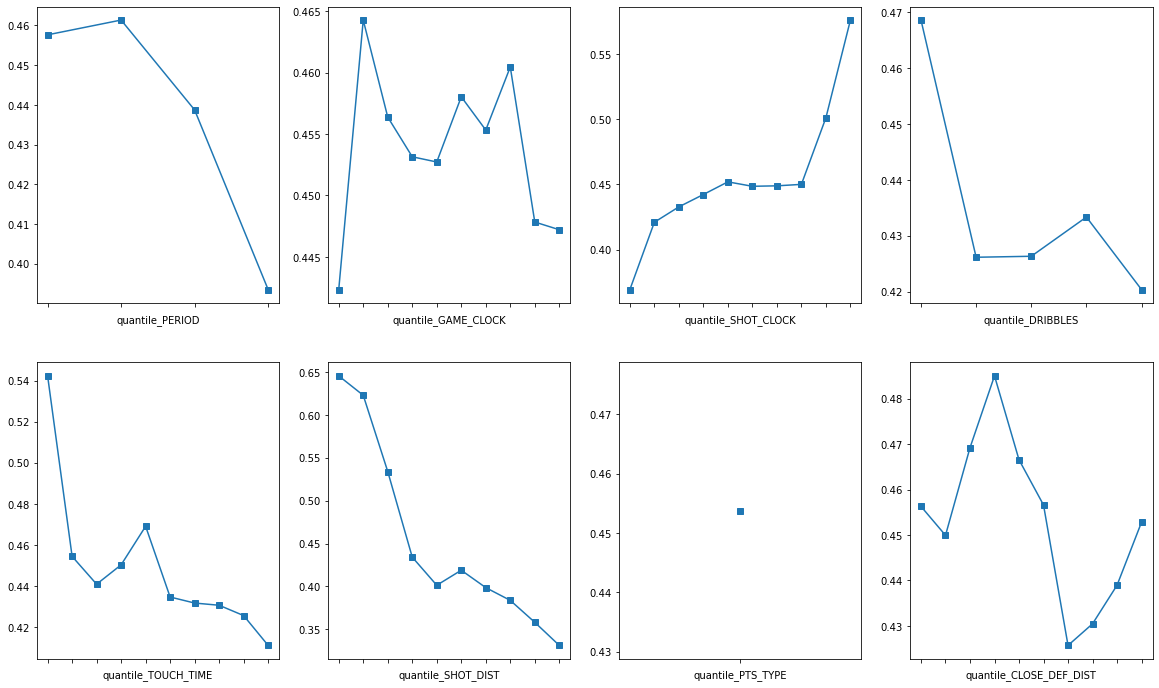

In [8]:
quantile_vars = quantile_df.columns

_, subplot_arr = plt.subplots(2, 4, figsize=(20, 12))

for idx, quantile_var in enumerate(quantile_vars):
    #print(quantile_df[quantile_var].value_counts())
    x_idx = idx // 4
    y_idx = idx % 4
    rate = []
    print(quantile_var)
    unique_list = sorted(quantile_df[quantile_var].unique())
    for uniq in unique_list:
        match = 0
        miss = 0
        row_index_list = quantile_df[quantile_df[quantile_var] == uniq].index.tolist()
        for row_index in row_index_list:
            if y_train_df.iloc[row_index]['FGM'] == 1:
                match = match + 1
            else:
                miss = miss + 1
        print(str(uniq) + " FG rate: " + str(match/(match+miss)))
        rate.append(match/(match+miss))
    subplot_arr[x_idx, y_idx].plot(list(map(str, unique_list)),rate,'s-')
    subplot_arr[x_idx, y_idx].set_xticklabels([])
    subplot_arr[x_idx, y_idx].set_xlabel(quantile_var)

    


根據以上的分析，可以看出球員的命中率和PERIOD、SHOT_CLOCK、DRIBBLES、TOUCH_TIME、SHOT_DIST有較為明顯的相關性

## 將training set 拆成training和validation

首先因為在 TOUCH_TIME 發現有不少負的value，而且有偏離0太多的值（eg -100.5）故將這些row移到validation set中

In [9]:
to_valid_x_df = X_train_df[X_train_df['TOUCH_TIME'] < 0]


dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index
to_valid_y_df = y_train_df.loc[dropped_row_index]

print(to_valid_x_df.shape)
print(to_valid_y_df.shape)

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)
print(X_train_df.shape)
print(y_train_df.shape)

(206, 8)
(206, 1)
(85545, 8)
(85545, 1)


In [10]:
to_valid_x_df.head()


,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
144,4,303,17.4,0,-0.4,23.9,3,6.0
366,2,325,11.8,0,-0.4,13.8,2,2.3
588,4,148,2.4,0,-0.2,18.2,2,4.0
775,2,423,4.3,0,-0.2,15.6,2,4.2
1113,2,191,14.2,0,-0.4,6.4,2,6.2


In [11]:
to_valid_y_df.head()

,FGM
144,0
366,0
588,0
775,0
1113,0


In [12]:
X_train_df.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [13]:
y_train_df.head()

,FGM
0,0
1,1
2,1
3,1
4,1


In [14]:
from sklearn.model_selection import train_test_split


X_train = X_train_df.iloc[:, :].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.1, random_state=0)

In [15]:
to_valid_x = to_valid_x_df.iloc[:,:].values
to_valid_y = to_valid_y_df.iloc[:]['FGM'].values

X_valid_concat = np.concatenate((X_valid, to_valid_x), axis = 0)
y_valid_concat = np.concatenate((y_valid, to_valid_y))



In [16]:
X_valid = X_valid_concat

y_valid = y_valid_concat

## 使用Ramdon Forest 來做分類

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_valid)

print('Accuracy (forest): %.2f' % accuracy_score(y_valid, y_pred))

Accuracy (forest): 0.61


In [18]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train_df.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) GAME_CLOCK                     0.206720
 2) SHOT_DIST                      0.195958
 3) SHOT_CLOCK                     0.189288
 4) CLOSE_DEF_DIST                 0.167806
 5) TOUCH_TIME                     0.138403
 6) PERIOD                         0.048963
 7) DRIBBLES                       0.046600
 8) PTS_TYPE                       0.006262


觀察到在利用Ramdom Forest來做分類問題時，其使用的feature的importance 前三名為 GAME_CLOCK，SHOT_DIST，SHOT_CLOCK

In [19]:
#選出random forest的前三重要feature

#print(indices)
#print(importances)

random_forest_sel_feature = X_train_df.columns.values[indices[:3]]
print(random_forest_sel_feature)

['GAME_CLOCK' 'SHOT_DIST' 'SHOT_CLOCK']


## 利用Ridge Classifier來分類

In [20]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_valid)

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train_std, y_train)

y_pred = ridge_clf.predict(X_valid_std)


print('Accuracy : %.2f' % accuracy_score(y_valid, y_pred))

Accuracy : 0.60


## Polynomial on Ridge Classifier

In [21]:
from sklearn.preprocessing import PolynomialFeatures

for degr in range(2,6):
    poly = PolynomialFeatures(degree = degr)

    poly_train = poly.fit_transform(X_train_std)
    poly_valid = poly.transform(X_valid_std)

    ridge_clf = RidgeClassifier()
    ridge_clf.fit(poly_train, y_train)

    y_pred = ridge_clf.predict(poly_valid)

    print('Degree = ' + str(degr) + ', Accuracy : %.2f' % accuracy_score(y_valid, y_pred))

Degree = 2, Accuracy : 0.62
Degree = 3, Accuracy : 0.62
Degree = 4, Accuracy : 0.62
Degree = 5, Accuracy : 0.62


## 利用從趨勢圖中，觀察到可能很重要的feature來做分類

我們重新load資料，並將負的TOUCH_TIME的row刪掉

In [22]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

X_test_df = pd.read_csv('./data/X_test.csv')

In [23]:
dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)


In [24]:
#Split data

X_train = X_train_df.loc[:, ['PERIOD','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','SHOT_DIST']].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=0)

## 利用random forest

In [25]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_valid)

print('Accuracy (forest): %.2f' % accuracy_score(y_valid, y_pred))

Accuracy (forest): 0.56


## 利用Ridge Classifier做分類

In [26]:
#Standardize the data

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_valid)

#Using Ridge 

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train_std, y_train)

y_pred = ridge_clf.predict(X_valid_std)


print('Accuracy : %.2f' % accuracy_score(y_valid, y_pred))

Accuracy : 0.60


## Polynomial

In [27]:
for degr in range(2,8):
    poly = PolynomialFeatures(degree = degr)

    poly_train = poly.fit_transform(X_train_std)
    poly_valid = poly.transform(X_valid_std)

    ridge_clf = RidgeClassifier()
    ridge_clf.fit(poly_train, y_train)

    y_pred = ridge_clf.predict(poly_valid)

    print('Degree = ' + str(degr) + ', Accuracy : %.2f' % accuracy_score(y_valid, y_pred))

Degree = 2, Accuracy : 0.60
Degree = 3, Accuracy : 0.61
Degree = 4, Accuracy : 0.61
Degree = 5, Accuracy : 0.61
Degree = 6, Accuracy : 0.61
Degree = 7, Accuracy : 0.61


## 利用random forest選出來前三重要的feature來train ridge classifier

In [28]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

X_test_df = pd.read_csv('./data/X_test.csv')

dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)

#Split data

X_train = X_train_df.loc[:, random_forest_sel_feature].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=0)
print(random_forest_sel_feature)
print(X_train.shape)

['GAME_CLOCK' 'SHOT_DIST' 'SHOT_CLOCK']
(72713, 3)


In [29]:
#Standardize the data

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_valid)

#Using Ridge 

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train_std, y_train)

y_pred = ridge_clf.predict(X_valid_std)


print('Accuracy : %.2f' % accuracy_score(y_valid, y_pred))

Accuracy : 0.60


## Polynomial

In [30]:
for degr in range(2,11):
    poly = PolynomialFeatures(degree = degr)

    poly_train = poly.fit_transform(X_train_std)
    poly_valid = poly.transform(X_valid_std)

    ridge_clf = RidgeClassifier()
    ridge_clf.fit(poly_train, y_train)

    y_pred = ridge_clf.predict(poly_valid)

    print('Degree = ' + str(degr) + ', Accuracy : %.2f' % accuracy_score(y_valid, y_pred))

Degree = 2, Accuracy : 0.61
Degree = 3, Accuracy : 0.61
Degree = 4, Accuracy : 0.61
Degree = 5, Accuracy : 0.61
Degree = 6, Accuracy : 0.61
Degree = 7, Accuracy : 0.61
Degree = 8, Accuracy : 0.61
Degree = 9, Accuracy : 0.61
Degree = 10, Accuracy : 0.61


就目前而言，我發現將全部的feature做poly feature後，經由ridge classifier去做分類在validation上有最高的accuracy

## 利用cross validation來evaluate上面的結果

In [31]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)

#Split data

X_train = X_train_df.iloc[:,:].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=0)


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

ridge_clf = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),RidgeClassifier())

score = cross_validate(ridge_clf, X_train, y_train, cv=5)

print(score['test_score'].mean())

ridge_clf.fit(X_train, y_train)

0.6144705357001762


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridgeclassifier', RidgeClassifier())])

In [33]:
ridge_clf.score(X_valid,y_valid)

0.6211034912718204

## 利用不同的train_test_split切法(random_state=1)，重新evaluate一次

In [34]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)

#Split data

X_train = X_train_df.iloc[:,:].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=1)

ridge_clf = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),RidgeClassifier())

score = cross_validate(ridge_clf, X_train, y_train, cv=5)

print("AVG score in CV: " + str(score['test_score'].mean()))

ridge_clf.fit(X_train, y_train)

print("Score on split validtion data: " + str(ridge_clf.score(X_valid,y_valid)))

AVG score in CV: 0.6171385852149237
Score on split validtion data: 0.606140897755611


## 利用不同的train_test_split切法(random_state=2)，重新evaluate一次

In [35]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)

#Split data

X_train = X_train_df.iloc[:,:].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=2)

ridge_clf = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),RidgeClassifier())

score = cross_validate(ridge_clf, X_train, y_train, cv=5)

print("AVG score in CV: " + str(score['test_score'].mean()))

ridge_clf.fit(X_train, y_train)

print("Score on split validtion data: " + str(ridge_clf.score(X_valid,y_valid)))

AVG score in CV: 0.6141681293362733
Score on split validtion data: 0.6249220698254364


## 利用現在的model，畫出error curve

Current Degree: 1
Current Degree: 2
Current Degree: 3
Current Degree: 4
Current Degree: 5
Current Degree: 6


/Users/jeremy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.09996e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Current Degree: 7


/Users/jeremy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06393e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


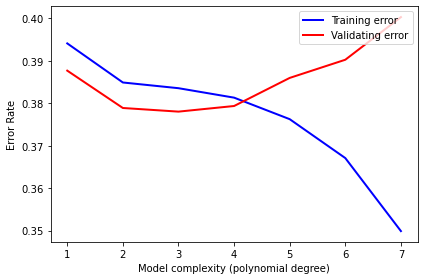

In [36]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)

#Split data

X_train = X_train_df.iloc[:,:].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_valid = sc.transform(X_valid)

error_rate_train = []
error_rate_valid = []

for degr in range(1,8):
    print("Current Degree: " + str(degr))
    poly = PolynomialFeatures(degree = degr)

    poly_X_train = poly.fit_transform(X_train)
    poly_X_valid = poly.transform(X_valid)

    ridge_clf = RidgeClassifier()
    ridge_clf.fit(poly_X_train,y_train)
    y_train_pred = ridge_clf.predict(poly_X_train)
    y_valid_pred = ridge_clf.predict(poly_X_valid)
    
    error_rate_train.append(1 - accuracy_score(y_train, y_train_pred))
    error_rate_valid.append(1 - accuracy_score(y_valid, y_valid_pred))

plt.plot(range(1, 8), error_rate_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, 8), error_rate_valid, label = 'Validating error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

可以看到，利用Ridge Classifier，隨著使用的polynomial degree增加，training error遞減。

但validting error在3->4就有了上升的趨勢，故判斷從4開始，就有overfitting的情況發生。

根據Occam’s razor，在degree是2和3時，validating error差不多，我這裡選擇使用degree為二的model來predict y_test。

另外也可以發現在degree=6和7時，程式發出ill-condition的warning，說明在degree=6和7時，有saddle point或者是pleatue。

## Predict y_test

In [37]:
X_train_df = pd.read_csv('./data/X_train.csv')
y_train_df = pd.read_csv('./data/y_train.csv')

dropped_row_index = X_train_df[X_train_df['TOUCH_TIME'] < 0].index

X_train_df = X_train_df.drop(dropped_row_index)
y_train_df = y_train_df.drop(dropped_row_index)

#Split data

X_train = X_train_df.iloc[:,:].values
y_train = y_train_df['FGM'].values
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.15, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_valid = sc.transform(X_valid)

poly = PolynomialFeatures(degree = 2)

poly_X_train = poly.fit_transform(X_train)
poly_X_valid = poly.transform(X_valid)



ridge_clf = RidgeClassifier()
ridge_clf.fit(poly_X_train,y_train)


y_valid_pred = ridge_clf.predict(poly_X_valid)

print('Accuracy of validation: %.10f' % accuracy_score(y_valid, y_valid_pred))

#Load test X, standardize it, do polynomialfeatures on it
X_test_df = pd.read_csv('./data/X_test.csv')

X_test = X_test_df.iloc[:,:].values

X_test = sc.transform(X_test)

poly_X_test = poly.transform(X_test)

y_test_pred = ridge_clf.predict(poly_X_test)

print(y_test_pred)

out_df = pd.DataFrame(y_test_pred, columns = ['FGM'])
print(out_df.head())
out_df.to_csv('./output/y_pred.csv', index=False)

Accuracy of validation: 0.6211034913
[0 0 1 ... 0 0 0]
   FGM
0    0
1    0
2    1
3    1
4    1


## Find top 3 features

上面，我利用Ramdom Forest，找出其前三重要的feature為 GAME_CLOCK,SHOT_DIST,SHOT_CLOCK

然而對於Ridge Classifier，其top3 feature不一定為上述三者。

用趨勢圖看出可能和結果有很大相關性的feature，也無法真的確定何者對Ridge Classifier最重要。

此處直覺想到的方法是利用組合，找出前三個能讓Ridge Classifier有最好 validation accuracy的feature。

In [38]:
from itertools import combinations

x_vars = X_train_df.columns.tolist()

combs = combinations(x_vars,3)

max_score = 0

top_features = []

for comb in list(combs):
    X_train = X_train_df.loc[:,comb].values
    y_train = y_train_df['FGM'].values
    
    ridge_clf = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),RidgeClassifier())
    score = cross_validate(ridge_clf, X_train, y_train, cv=5)
    if score['test_score'].mean() > max_score:
        max_score = score['test_score'].mean()
        top_features = comb
        
print(top_features)
print("Accuracy with only top 3 features: " + str(max_score))

('TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST')
Accuracy with only top 3 features: 0.6138757379157169


由上面的實驗看出，在以polynomial degree為2的Ridge Classifier當作model的情況下

'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST'是前三重要的features

## Report

在pre-process data的部分，我將各feature和FGM的關係畫出來，發現到TOUCH_TIME有負的值，而在趨勢上，看不出來彼此之間的關係是什麼。

接著，我在各feature隔出區間，看在各區間的FG命中率有什麼現象，發現到有些feature和命中率有相關性。

訓練模型時，我先把全部的feature拿去餵給Random Forest，並觀察哪些feature對random forest是重要的。

也利用同樣的方法去訓練Ridge Classifier，發現當polynomial degree 上升，accurary也有上升的情況。(accuracy在0.62上下)

再來，我利用Random Forest選出的重要feature去訓練Ridge Classifier，但結果並沒有比較好(0.61)。

同樣地，我利用一開始畫圖所觀察到的feature去訓練Ridge Classifier，結果也是沒有和把feature全部餵下去好(0.61)。

於是我最終決定利用全部feature，去train的Ridge Classifier。

畫出error curve時，觀察到在degree為4時，validting error就有上升的趨勢（表示從degree為4時，可能開始有over-fitting），而在degree為2或3時，accuracy差不多，故我選擇degree為2的model。

在evaluate model的部分，我將data split成兩部分，training data和validation data。

而我在training data上做五次cross validation，再利用此模型去predict切出來的validation data。

這個步驟我做了三次，平均在validation data上的accuracy為0.62上下。

最後要選出TOP3 feature。

針對這個問題我利用combination的方式去找使得目前使用的模型有最高accuracy的features。

選到的是TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST。

而利用此三個feature訓練出的function在validation data上的accuracy為 0.613。

關於此lab，我有幾點想法。

1.feature數量少，且有些feature彼此之間也有很大的關聯性（ex. PTS_TYPE 和 SHOT_DIST），這一點造成accuracy的提升遇到瓶頸。

2.如同Standandford 那篇refrence reading所言，球場上有太多影響球員是否能命中的要素，如主客場、防守球員是誰等，這些要素有些可以透過收集得來，但像是場邊觀眾的反應、比賽中發生的爭執就比較難量化成feature。

3.我試過利用PCA將資料維度降為三個維度，但得以想見其訓練出的model accuracy並不會比較高，因為有一些資訊會loss掉，且此問題的feature不多，利用PCA也沒有什麼意義。

4.在Standandford那篇中提到有人利用XGBoost可以到0.68的準確度，但我認為在這次的lab效益並不大，主要是data不一樣。

